In [1]:
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sys
sys.path.append("tools/")
sys.path.append("dataset/")
sys.path.append("explore_dataset/")

import explorer
from feature_format import featureFormat, targetFeatureSplit

%matplotlib inline


<h2>Question 1</h2>

>Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those? [Relevant rubric items: “data exploration”, “outlier investigation”]


In [2]:
data_dict = {}
dataset = 'dataset/final_project_dataset.pkl'

#--- extract dictionary from dataset:
with open(dataset, 'rb') as data_file:
    data_dict = pickle.load(data_file)

#--- explore data:
explore_obj = explorer.explorer(data_dict)

def repeat_to_length(string_to_expand, length):
    return (string_to_expand * (int(length/len(string_to_expand))+1))[:length]

parameters = explore_obj.get_dataset_parameters()
for k,v in parameters.items():
    l = 45 - len(k)
    dots = repeat_to_length('.', l)
    v = round(v,2)
    if '%' in k:
        v = str(v) + '%'
    print('{0}: {1} {2}'.format(k, dots, v))


Number of individuals: ........................ 146
Number of features: ........................... 21
Number of POIs: ............................... 18
Number of non POIs: ........................... 128
Folks with salary: ............................ 95
Number of Folks with NaN salary: .............. 21
Percentage of Folks with NaN salary (%): ...... 14.38%
Number of POIs with NaN salary: ............... 0
Percentage of POIs with NaN salary (%): ....... 0.0%


In [3]:
def plot_results(features, features_list, title):
    try:
        plt.scatter(features, reg.predict(features), color='blue')
        ax = plt.gca()
        ax.set_title(title)
        ax.set_xlabel(features_list[0])
        ax.set_ylabel(features_list[1])
        plt.show()
    except NameError:
        pass

coefficient = [ 0.03037927]
intercept = 225498.2098194093
r2score = 0.11205094126051063


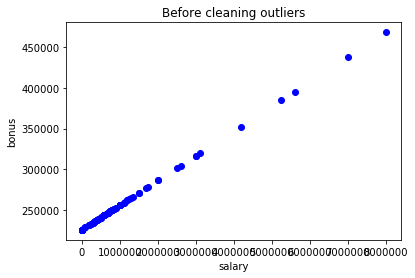

In [5]:
feature_list = ['salary', 'bonus']

#--- remove TOTAL:
data_dict.pop('TOTAL', 0)

data_arr = featureFormat(data_dict, feature_list)

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#--- prepare the data for training
target, features = targetFeatureSplit(data_arr)
X, x, Y, y = train_test_split(features, target)

#--- create regression object:
reg = linear_model.LinearRegression()
reg.fit(X, Y)

#--- make predictions:
y_prediction = reg.predict(x)

#--- check predictions:
coeff = reg.coef_
intercept = reg.intercept_
r2_score = r2_score(y, y_prediction)

print('coefficient = {}'.format(coeff))
print('intercept = {}'.format(intercept))
print('r2score = {}'.format(r2_score))

plot_results(features, feature_list, 'Before cleaning outliers')

In [7]:
#--- remove outliers by cleaning away specific % amount of the
#--- largest residual errors
def clean_outliers(features, perc):
    dirty_data = []

    prediction = reg.predict(features)

    for i in range(0, len(target)):
        dirty_data.append((features[i][0], target[i], (prediction[i]-target[i])**2))

    dirty_df = pd.DataFrame(dirty_data, columns=[feature_list[0], feature_list[1], 'Error'])
    dirty_df = dirty_df.sort_values(by=['Error']).reset_index(drop=True)

    clean_df = dirty_df[:(len(dirty_df.index)-perc)]

    return clean_df



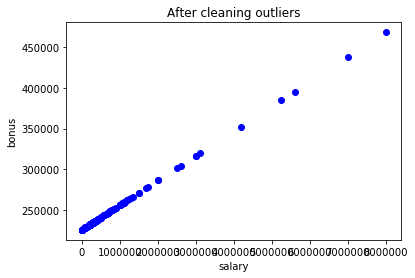

In [8]:
#--- clean results:
clean_df = clean_outliers(features, 0)

#--- plot results:
features_clean = clean_df.loc[:,:'bonus'].values

clean_arr = []
for i in range(0, len(features_clean)):
    m, n = features_clean[i]
    clean_arr.append(np.array([m]))
    clean_arr.append(np.array([n]))

plot_results(clean_arr, feature_list, 'After cleaning outliers')
 



<h2>Question 2</h2>

>
What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importance of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values. [relevant rubric items: “create new features”, “intelligently select features”, “properly scale features”]